# Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
import gensim
from wordcloud import WordCloud, STOPWORDS
# import tensorflow as tf
# from tensorflow.python.keras import models
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras.layers import Dropout

from seinfeld_laugh_corpus import corpus
from seinfeld_playground import *

%load_ext autoreload
%autoreload 2

In [2]:
df = load_corpus()
df_main_characters = df[df['character'].isin(["JERRY", "ELAINE", "KRAMER", "GEORGE"])]

In [3]:
df.head(1)

,character,txt,num_words,start,end,length,is_funny,laugh_time,episode_num,line_num,episode_name,season,total_lines,global_episode_num
0,JERRY,"Here's what happened last week, incase you mi...",9,1.106,3.05,1.944,True,3.6,6,0,The Watch,4,486,1


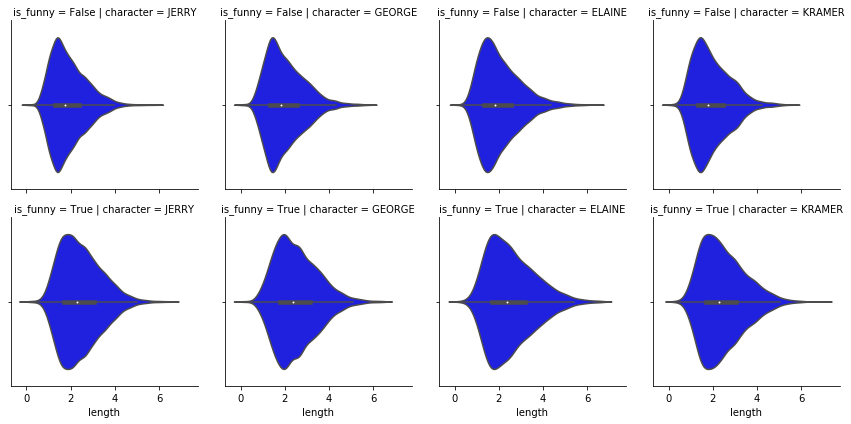

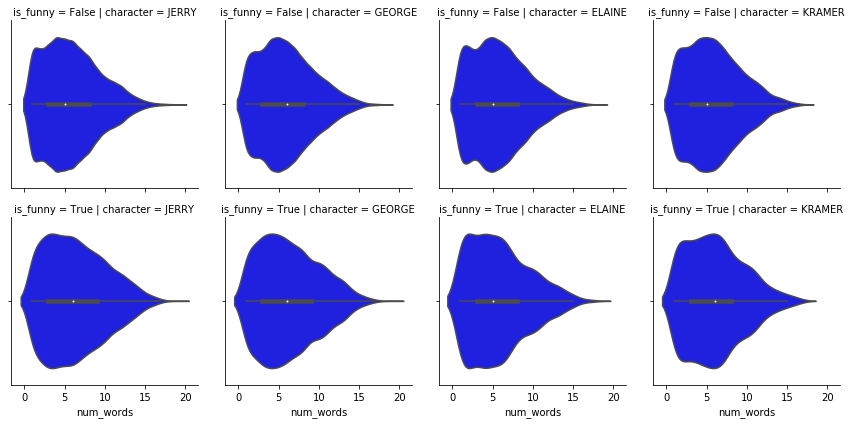

In [9]:
def plot_per_character_cross_is_funny(df, colname):
    """
    Plot a Violin-Plot for the given colname, splitting by (character x is_funny)
    """
    g = sns.FacetGrid(df, col='character', row='is_funny')
    g.map(sns.violinplot, colname, bins=50, color='b')

    plt.show()

plot_per_character_cross_is_funny(df_main_characters, "length")
plot_per_character_cross_is_funny(df_main_characters, "num_words")

In [5]:
# Descrive the number of words in a sentence, by character and by funniness.
# We can learn that some characters (like Jerry) usually say more words in a funny sentence,
# but some characters are not (like Elaine)
df_main_characters.groupby(["character", "is_funny"]).describe()['num_words']

count      mean       std  min  25%  50%  75%   max
character is_funny                                                      
ELAINE    False     5181.0  5.734221  3.374988  1.0  3.0  5.0  8.0  18.0
          True      1763.0  5.785593  3.632130  1.0  3.0  5.0  8.0  18.0
GEORGE    False     6093.0  5.913836  3.369355  1.0  3.0  6.0  8.0  18.0
          True      2703.0  6.295228  3.667046  1.0  3.0  6.0  9.0  19.0
JERRY     False     8357.0  5.802800  3.422097  1.0  3.0  5.0  8.0  19.0
          True      3659.0  6.411588  3.731420  1.0  3.0  6.0  9.0  19.0
KRAMER    False     4318.0  5.800602  3.355106  1.0  3.0  5.0  8.0  17.0
          True      2177.0  6.083142  3.576883  1.0  3.0  6.0  8.0  17.0

In [6]:
# Descrive the length (in time) of a sentence, by character and by funniness.
# Same as above, some characters (like Jerry) usually their funny sentences are longer,
# Note that Elaine also has this attribute, despite the fact that 
# the number of words is not so different between funny and not-funny sentences.
df_main_characters.groupby(["character", "is_funny"]).describe()['length']

count      mean       std    min    25%    50%    75%  \
character is_funny                                                           
ELAINE    False     5181.0  2.029553  0.908123  0.116  1.347  1.829  2.555   
          True      1763.0  2.541912  1.066384  0.210  1.708  2.364  3.194   
GEORGE    False     6093.0  2.006164  0.869716  0.014  1.348  1.829  2.534   
          True      2703.0  2.517910  0.968263  0.100  1.795  2.367  3.126   
JERRY     False     8357.0  1.890218  0.798056  0.049  1.300  1.727  2.364   
          True      3659.0  2.426743  0.932661  0.034  1.716  2.295  3.034   
KRAMER    False     4318.0  1.933257  0.840627  0.019  1.305  1.761  2.466   
          True      2177.0  2.437329  0.984176  0.274  1.676  2.261  3.023   

                      max  
character is_funny         
ELAINE    False     6.403  
          True      6.597  
GEORGE    False     5.834  
          True      6.437  
JERRY     False     5.902  
          True      6.505  
KRAMER    False     5.587  
          True      6.934

Jerry


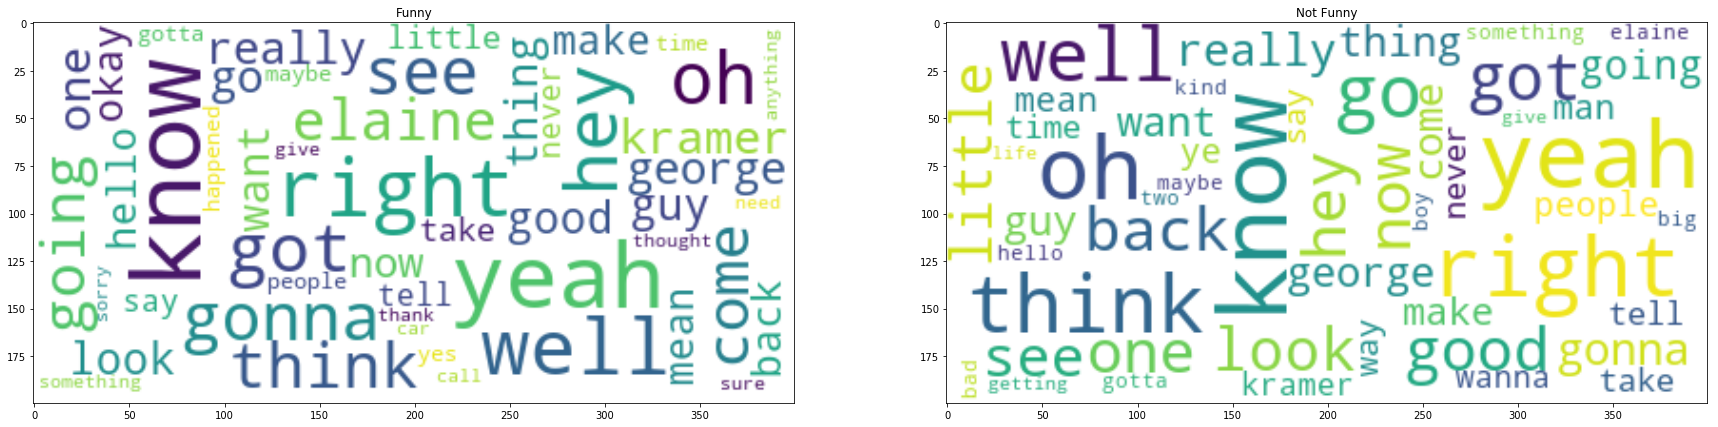

Elaine


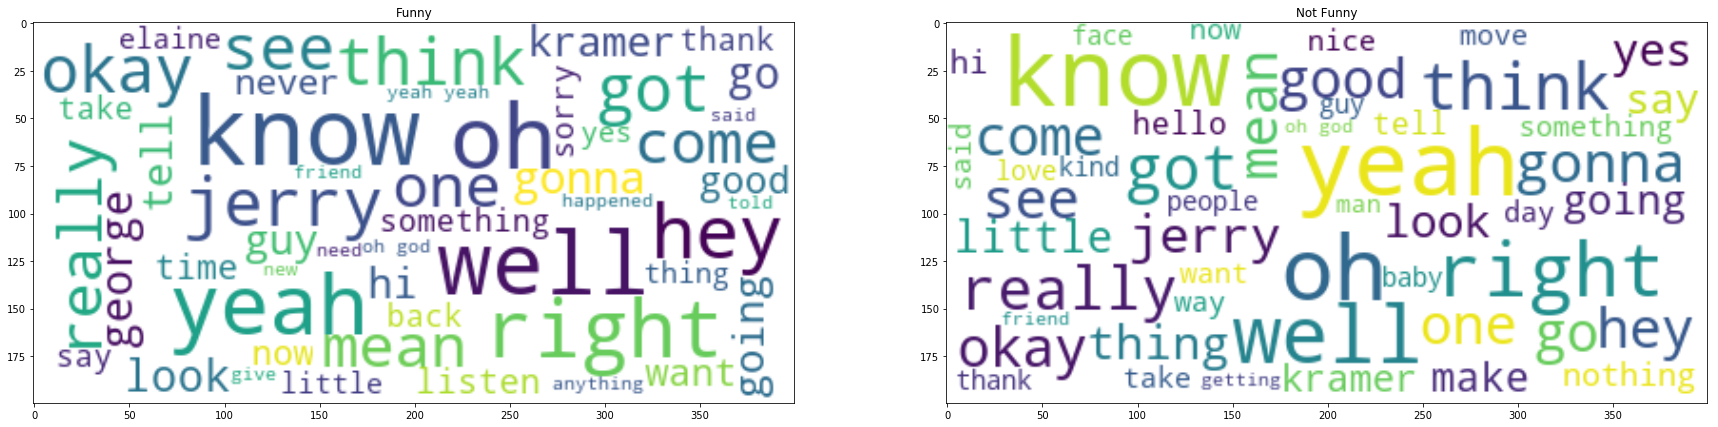

Kramer


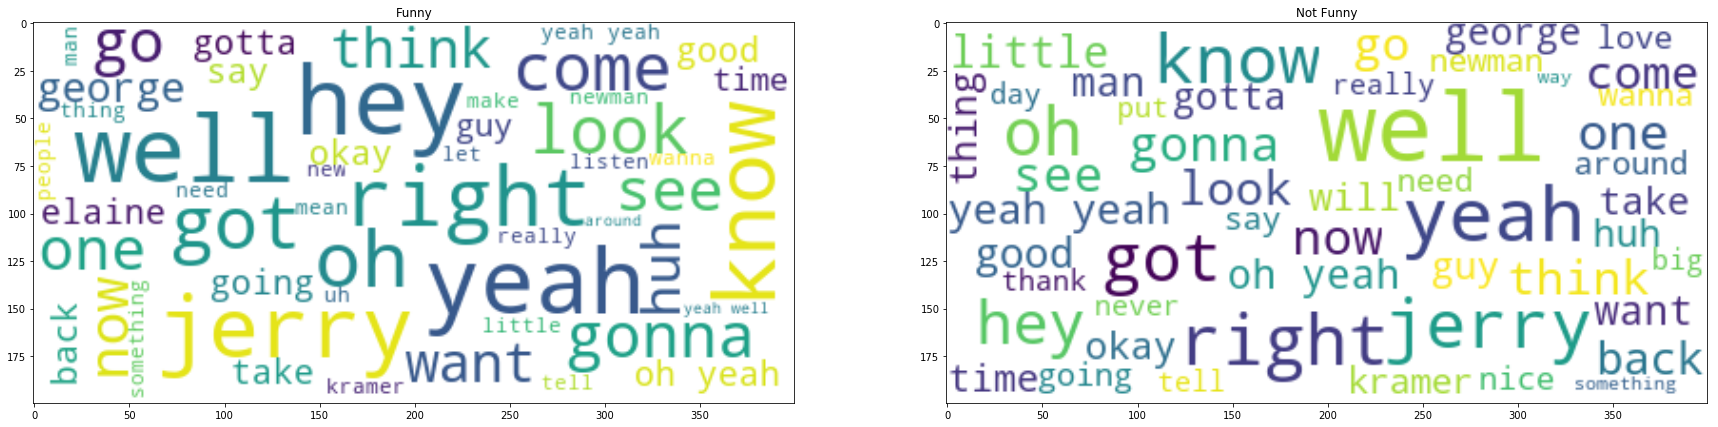

George


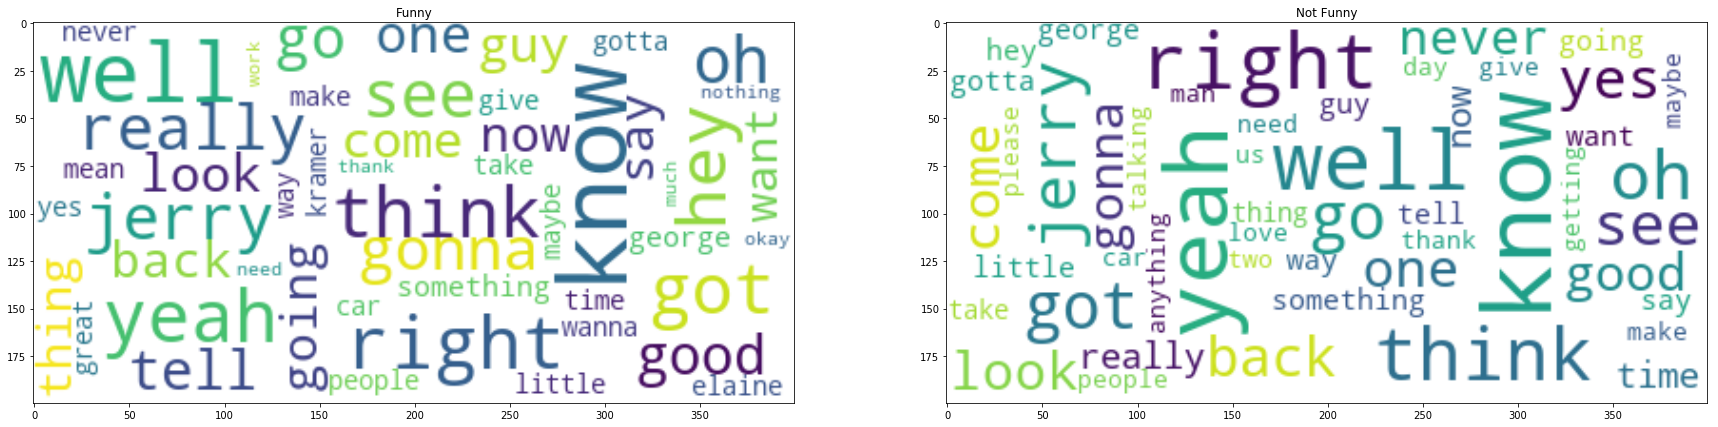

In [7]:
def plot_wordcloud(df, character):
    """
    Plot word-cloud for the given character
    """
    character_df = df[df['character'] == character]
    
    character_funny_text = " ".join(character_df[character_df['is_funny'] == False].txt).lower()
    character_not_funny_text = " ".join(character_df[character_df['is_funny'] == True].txt).lower()
    wordcloud_funny = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(character_funny_text)
    wordcloud_not_funny = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(character_not_funny_text)
    plt.figure(figsize=(30, 30))
    plt.title(character)
    plt.axis("off")
    plt.subplot(121)
    plt.title("Funny")
    plt.imshow(wordcloud_funny, interpolation="bilinear")
    plt.subplot(122)
    plt.title("Not Funny")
    plt.imshow(wordcloud_not_funny, interpolation="bilinear")
    plt.show()

print("Jerry")
plot_wordcloud(df, "JERRY")
print("Elaine")
plot_wordcloud(df, "ELAINE")
print("Kramer")
plot_wordcloud(df, "KRAMER")
print("George")
plot_wordcloud(df, "GEORGE")

In [8]:
df_with_scenes = getSceneData(df)
df_with_scenes.head()

,character,txt,num_words,start,end,length,is_funny,laugh_time,episode_num,line_num,...,season,total_lines,global_episode_num,time_from_prev,new_scene,scene_text,scene_characters,n_scene_characters,scene_number_in_episode,global_scene_number
0,JERRY,"Here's what happened last week, incase you mi...",9,1.106,3.050,1.944,True,3.6,6,0,...,4,486,1,0.000,True,"Here's what happened last week, incase you mi...","{MORTY, JERRY}",2,1,1
1,JERRY,"George and I went up to NBC, and we told them...",16,3.074,6.371,3.297,False,NaN,6,1,...,4,486,1,0.024,False,"Here's what happened last week, incase you mi...","{MORTY, JERRY}",2,1,1
2,JERRY,We're waiting to sign the contract.,6,6.444,7.822,1.378,False,NaN,6,2,...,4,486,1,0.073,False,"Here's what happened last week, incase you mi...","{MORTY, JERRY}",2,1,1
3,JERRY,"Jerry, I want you to sign that contract.",8,7.846,9.364,1.518,False,NaN,6,3,...,4,486,1,0.024,False,"Here's what happened last week, incase you mi...","{MORTY, JERRY}",2,1,1
4,JERRY,We're gonna sign it.,4,9.364,10.881,1.517,False,NaN,6,4,...,4,486,1,0.000,False,"Here's what happened last week, incase you mi...","{MORTY, JERRY}",2,1,1
